In [1]:
# 🛠️ Data Handling
import pandas as pd
import numpy as np

# 📊 Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 🧪 Data Splitting & Preparation
from sklearn.model_selection import train_test_split, cross_val_score  

# 🔁 Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler  
# 🤖 Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 🎯 Model Evaluation Metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score

# ⚙️ Pipeline Tools
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer  

# 🧼 Pandas Display Settings
pd.set_option('display.max_columns', None)


In [2]:
# 📥 Load dataset
df = pd.read_csv("Paytm_Epurchase_data.csv")

In [3]:
df.head()

,S.no,Name,Shipping_city,Category_Grouped,Category,Sub_category,Product_Gender,Segment,Family,Brand,Brick,Item_NM,Color,Size,Sale_Flag,Payment_Method,coupon_money_effective,Coupon_Percentage,Quantity,Cost_Price,Item_Price,Special_Price_effective,paid_pr_effective,Value_CM1,Value_CM2,Special_price,Paid_pr
0,1,ABHINAV CHATTER,Jabalpur,Others,SUNGLASSES,SUNGLASSES,UNISEX,SUNGLASSES,UNISEX,RAY BAN,AVIATOR,Rb3025 003/32 Grey Sunglasses,GREY,FREE SIZE,0,COD,454.62,0,1,2294.54,4999,4999.0,4544.38,1722.77,1134.77,4999,4544
1,2,AMIT GALPHADE,Ahmedabad,Apparels,Sports Equipment,Sports Apparel,MEN,MENS WEAR,SPORT & ADVENTURE,SKINS,TIGHTS,SKINS Navy Blue Tights,BLACK,XL,1,COD,0.00,0,1,2919.33,4999,4999.0,4999.00,1499.87,876.87,4999,4999
2,3,PRABHU NAMBIAPP,Chennai,Others,Bags,Bags,UNISEX,UNISEX,NaN,VIP,STROLLEY,Black Soft Strolley,BLACK,55CM,0,Prepaid,0.00,0,1,2186.66,4095,4095.0,4095.00,1433.07,955.07,4095,4095
3,4,MALLIKARJUNA H,Bangalore,Apparels,Sports Equipment,Sports Apparel,MEN,MENS WEAR,SPORT & ADVENTURE,SKINS,TIGHTS,SKINS Navy Blue Tights,BLACK,XL,1,COD,0.00,0,1,2919.33,4999,4999.0,4999.00,1499.87,876.87,4999,4999
4,5,ANUPAM UPADHYAY,Gurgaon,Shoes,Men Footwear,Mens Footwear,MEN,MENS FOOTWEAR,SPORTS,NIKE,BASKETBALL SHOES,Air Visi Pro Iii Nbk Black Basketball Shoes,BLACK,11,0,Prepaid,1873.75,25,1,5167.83,7495,7495.0,5621.25,-198.99,-357.99,7495,5621


In [4]:
# 🧾 Basic data exploration and cleanup

# Show dataset shape
print("🔢 Dataset shape:", df.shape)

🔢 Dataset shape: (50846, 27)


In [5]:
# Show info about data types and non-null counts
print("\n📋 DataFrame Info:")
df.info()


📋 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50846 entries, 0 to 50845
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S.no                     50846 non-null  int64  
 1   Name                     50846 non-null  object 
 2   Shipping_city            50846 non-null  object 
 3   Category_Grouped         50846 non-null  object 
 4   Category                 50846 non-null  object 
 5   Sub_category             50846 non-null  object 
 6   Product_Gender           50205 non-null  object 
 7   Segment                  50846 non-null  object 
 8   Family                   35313 non-null  object 
 9   Brand                    50846 non-null  object 
 10  Brick                    50846 non-null  object 
 11  Item_NM                  50846 non-null  object 
 12  Color                    50846 non-null  object 
 13  Size                     50846 non-null  object 
 14  Sal

In [6]:
# Display all column names
print("\n---- Column Names ----")
print(df.columns.tolist())


---- Column Names ----
['S.no', 'Name', 'Shipping_city', 'Category_Grouped', 'Category', 'Sub_category', 'Product_Gender', 'Segment', 'Family', 'Brand', 'Brick', 'Item_NM', 'Color', 'Size', 'Sale_Flag', 'Payment_Method', 'coupon_money_effective', 'Coupon_Percentage', 'Quantity', 'Cost_Price', 'Item_Price', 'Special_Price_effective', 'paid_pr_effective', 'Value_CM1', 'Value_CM2', 'Special_price', 'Paid_pr']


In [7]:
# Check missing values per column
print("\n🚨 Missing values per column:")
print(df.isna().sum())


🚨 Missing values per column:
S.no                           0
Name                           0
Shipping_city                  0
Category_Grouped               0
Category                       0
Sub_category                   0
Product_Gender               641
Segment                        0
Family                     15533
Brand                          0
Brick                          0
Item_NM                        0
Color                          0
Size                           0
Sale_Flag                      0
Payment_Method                 0
coupon_money_effective         0
Coupon_Percentage              0
Quantity                       0
Cost_Price                     0
Item_Price                     0
Special_Price_effective        0
paid_pr_effective              0
Value_CM1                      0
Value_CM2                      0
Special_price                  0
Paid_pr                        0
dtype: int64


In [8]:
# ❌ Drop the 'Family' column (irrelevant or not needed)
df = df.drop(columns=['Family'])
print("\n✅ 'Family' column dropped.")


✅ 'Family' column dropped.


In [9]:
# Show updated column names
print("\n📌 Updated column names:")
print(df.columns.tolist())


📌 Updated column names:
['S.no', 'Name', 'Shipping_city', 'Category_Grouped', 'Category', 'Sub_category', 'Product_Gender', 'Segment', 'Brand', 'Brick', 'Item_NM', 'Color', 'Size', 'Sale_Flag', 'Payment_Method', 'coupon_money_effective', 'Coupon_Percentage', 'Quantity', 'Cost_Price', 'Item_Price', 'Special_Price_effective', 'paid_pr_effective', 'Value_CM1', 'Value_CM2', 'Special_price', 'Paid_pr']


In [10]:
# 👀 Preview missing Product_Gender entries along with their Category
print("\n🔍 Preview of missing 'Product_Gender' entries:")
print(df[df['Product_Gender'].isna()][['Category', 'Product_Gender']].head())


🔍 Preview of missing 'Product_Gender' entries:
    Category Product_Gender
173     Home            NaN
391     Home            NaN
416     Home            NaN
556     Home            NaN
586     Home            NaN


In [11]:
# Count of 'HOME' in the Category column
home_count = df['Category'].value_counts().get('Home', 0)
print(f"\n🏠 Number of 'HOME' entries in Category: {home_count}")


🏠 Number of 'HOME' entries in Category: 641


In [12]:
# 🎯 Custom imputation: set Product_Gender as 'UNISEX' for all 'Home' category entries
df.loc[(df['Category'] == 'Home') & (df['Product_Gender'].isna()), 'Product_Gender'] = 'UNISEX'
print("\n✅ Missing 'Product_Gender' values for 'Home' category replaced with 'UNISEX'.")


✅ Missing 'Product_Gender' values for 'Home' category replaced with 'UNISEX'.


In [13]:
# Show basic statistics for numerical columns
print("\n📊 Descriptive statistics for numerical columns:")
print(df.describe())


📊 Descriptive statistics for numerical columns:
              S.no     Sale_Flag  coupon_money_effective  Coupon_Percentage  \
count  50846.00000  50846.000000            50846.000000       50846.000000   
mean   25423.50000      0.318039              215.132299           1.653286   
std    14678.12023      0.465719              441.535678           5.643109   
min        1.00000      0.000000                0.000000           0.000000   
25%    12712.25000      0.000000                0.000000           0.000000   
50%    25423.50000      0.000000                0.000000           0.000000   
75%    38134.75000      1.000000                0.000000           0.000000   
max    50846.00000      1.000000             1873.750000          25.000000   

           Quantity    Cost_Price    Item_Price  Special_Price_effective  \
count  50846.000000  50846.000000  50846.000000             50846.000000   
mean       1.000669   3270.549269   5830.477088              5168.010748   
std        

In [14]:
# Show basic statistics for categorical columns 
print("\n🧠 Descriptive stats for object (categorical) columns:")
print(df.describe(include='object'))


🧠 Descriptive stats for object (categorical) columns:
              Name Shipping_city Category_Grouped      Category  \
count        50846         50846            50846         50846   
unique       45735          2587                4            11   
top     AMIT KUMAR     New Delhi           Others  Men Footwear   
freq            33          4550            20310         17647   

         Sub_category Product_Gender        Segment  Brand          Brick  \
count           50846          50846          50846  50846          50846   
unique             16              3             15     40             25   
top     Mens Footwear            MEN  MENS FOOTWEAR   NIKE  RUNNING SHOES   
freq            14380          27614          17647   8189           9366   

                                                  Item_NM  Color       Size  \
count                                               50846  50846      50846   
unique                                                 76     17 

In [15]:
# --- 6. Categorical Columns and Their Unique Value Counts ---
unique_counts = pd.DataFrame({
    'Column': df.select_dtypes(include='object').columns,
    'Unique_Values': [df[col].nunique() for col in df.select_dtypes(include='object').columns]
})
print("\n🧩 Unique value counts for each categorical column:")
print(unique_counts)




🧩 Unique value counts for each categorical column:
              Column  Unique_Values
0               Name          45735
1      Shipping_city           2587
2   Category_Grouped              4
3           Category             11
4       Sub_category             16
5     Product_Gender              3
6            Segment             15
7              Brand             40
8              Brick             25
9            Item_NM             76
10             Color             17
11              Size             18
12    Payment_Method              2


In [16]:
# 🔍 Display unique values for selected categorical columns
cols = ['Category', 'Brand', 'Color', 'Size']  # Selected categorical columns to inspect
unique_details = {col: df[col].unique() for col in cols}

# Convert the dictionary to a DataFrame for easier viewing
pd.DataFrame(dict([(k, pd.Series(v)) for k, v in unique_details.items()]))

# 🔢 Show just the count of unique values per selected column
print("\n📊 Number of unique values per selected column:")
for col in cols:
    print(f"{col} → {df[col].nunique()} unique values")



📊 Number of unique values per selected column:
Category → 11 unique values
Brand → 40 unique values
Color → 17 unique values
Size → 18 unique values


In [17]:
# 📈 Visualize correlation among top numeric features with customizable method
def show_correlation_advanced(df, top_n=10, method='pearson'):
    # 🎯 Select numeric columns only
    numeric_df = df.select_dtypes(include='number')

    # 📊 Pick top N columns with highest variance
    top_cols = numeric_df.var().sort_values(ascending=False).head(top_n).index
    filtered_df = numeric_df[top_cols]

    # 🔗 Compute correlation matrix using selected method (e.g., pearson, spearman)
    corr_matrix = filtered_df.corr(method=method)

    # --- 1. 🔥 Heatmap ---
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix (Top {top_n} Numeric Columns) - Method: {method}", fontsize=14)
    plt.tight_layout()
    plt.show()

    # --- 2. 🔍 Show Top 3 strongest correlation pairs ---
    corr_pairs = (
        corr_matrix.unstack()
        .reset_index()
        .rename(columns={"level_0": "Feature1", "level_1": "Feature2", 0: "Correlation"})
    )

    # Filter self-correlations and duplicates
    corr_pairs = corr_pairs[corr_pairs["Feature1"] != corr_pairs["Feature2"]]
    corr_pairs["AbsCorr"] = corr_pairs["Correlation"].abs()
    corr_pairs = corr_pairs.sort_values("AbsCorr", ascending=False).drop_duplicates(subset=["AbsCorr"])

    print("\n🔝 Top 3 Strongest Correlations:")
    print(corr_pairs.head(3)[["Feature1", "Feature2", "Correlation"]])

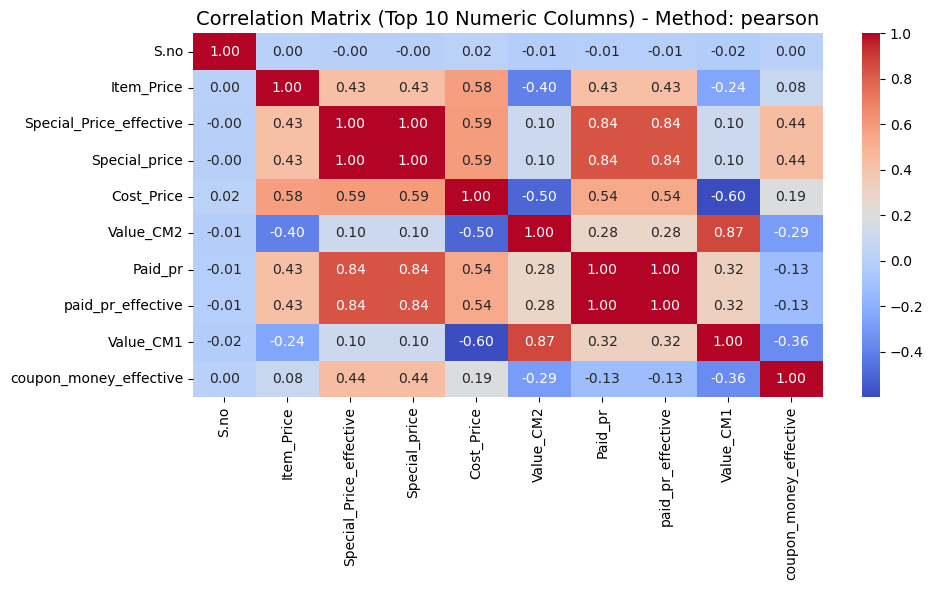


🔝 Top 3 Strongest Correlations:
             Feature1                 Feature2  Correlation
32      Special_price  Special_Price_effective     1.000000
76  paid_pr_effective                  Paid_pr     1.000000
85          Value_CM1                Value_CM2     0.871987


In [18]:
# 📌 Run the correlation analysis on top numeric features
show_correlation_advanced(df, top_n=10)

# --- 8. Visualization Section ---


📊 Generating Visualizations...


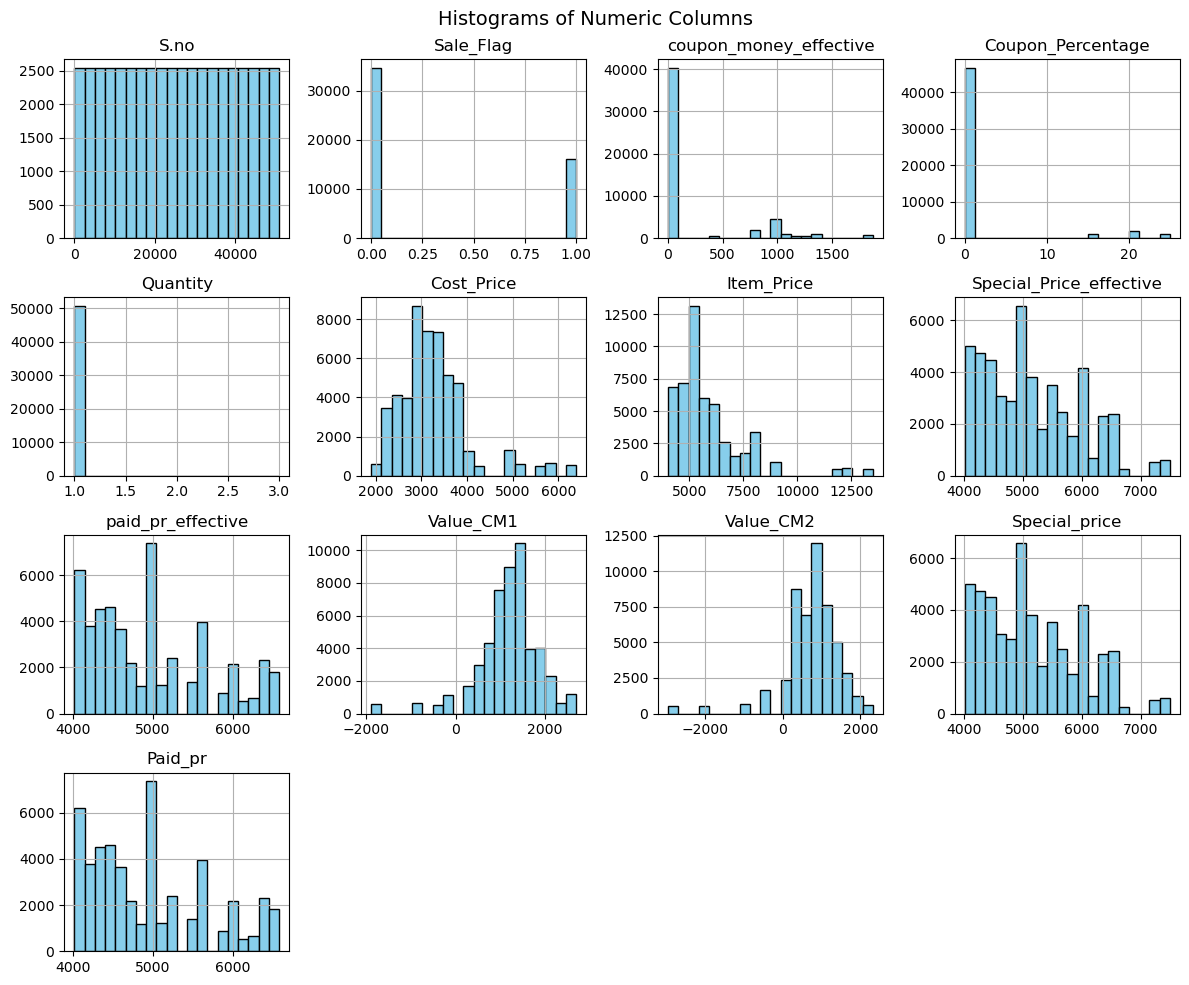

In [19]:
print("\n📊 Generating Visualizations...")

# 🔢 8.1 Histogram for all numeric columns
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Columns", fontsize=14)
plt.tight_layout()
plt.show()

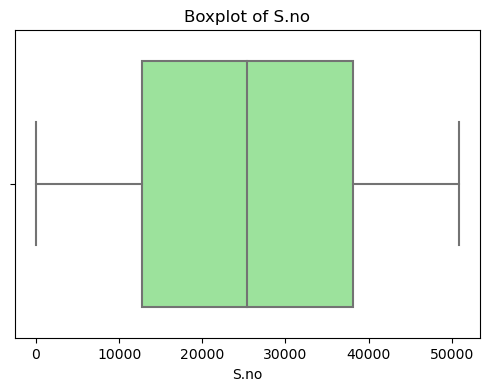

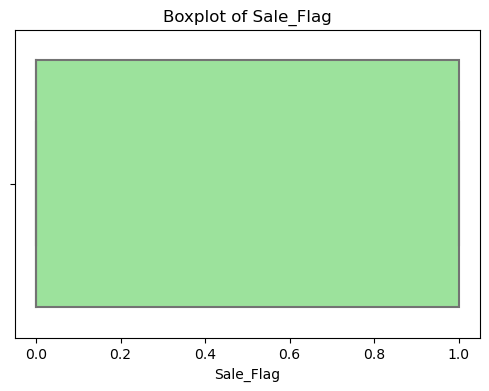

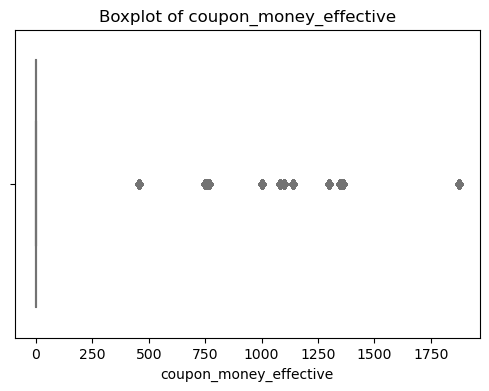

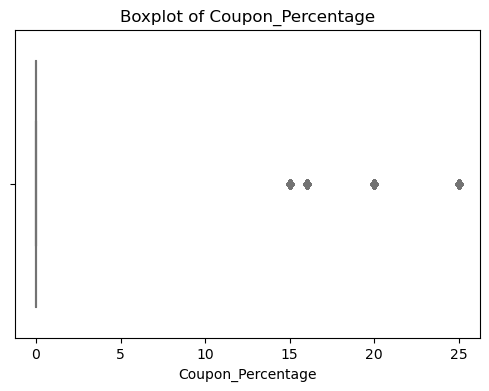

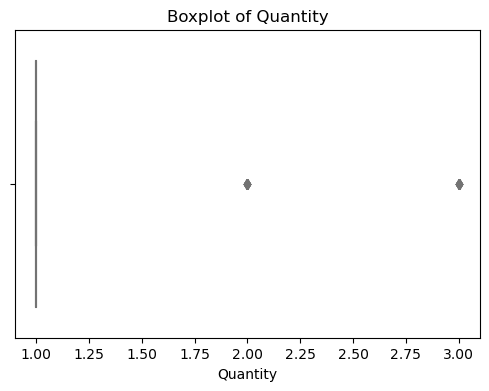

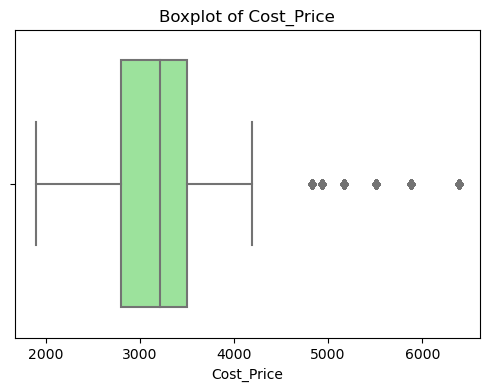

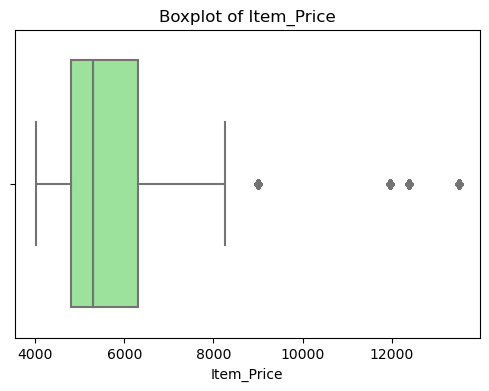

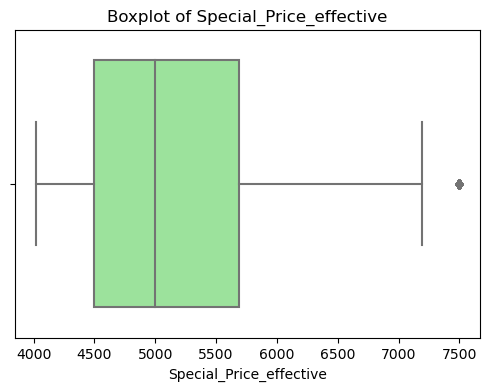

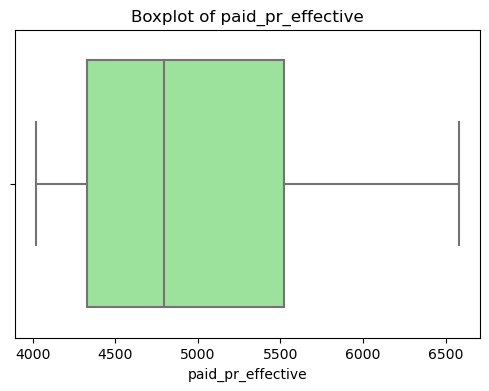

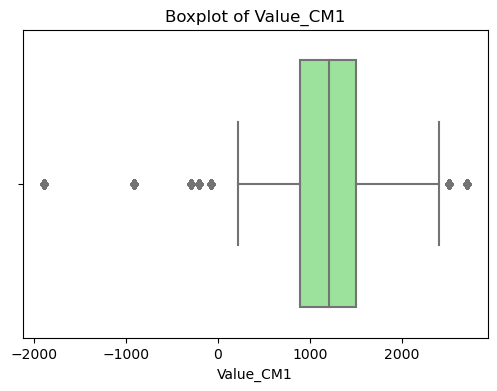

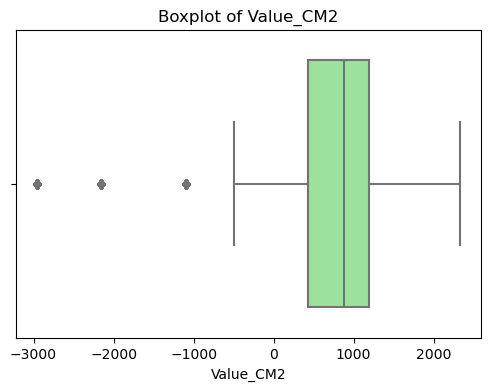

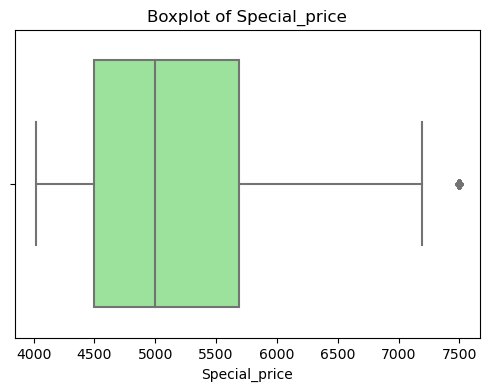

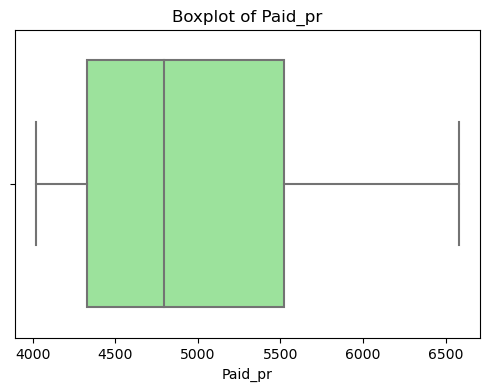

In [20]:
# 8.2 Boxplot لاكتشاف Outliers
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.show()

In [21]:
# 🧾 Display top 10 most frequent values for each categorical column
for col in df.select_dtypes(include='object').columns:
    print(f"--- {col} ---")
    print(df[col].value_counts().head(10))
    print("\n")

--- Name ---
Name
AMIT KUMAR       33
amit kumar       26
ANIL KUMAR       25
SANJAY KUMAR     25
manoj kumar      24
MANOJ KUMAR      22
MANISH KUMAR     22
RAJESH KUMAR     21
SANTOSH KUMAR    20
pradeep kumar    20
Name: count, dtype: int64


--- Shipping_city ---
Shipping_city
New Delhi    4550
Chennai      4254
Bangalore    3973
Mumbai       3158
Hyderabad    2849
Pune         1555
Kolkata      1289
Lucknow       934
Noida         761
Gurgaon       714
Name: count, dtype: int64


--- Category_Grouped ---
Category_Grouped
Others       20310
Shoes        19994
Apparels     10018
Furniture      524
Name: count, dtype: int64


--- Category ---
Category
Men Footwear        17647
WATCHES             10440
Women Apparel        6931
SUNGLASSES           4030
Bags                 3949
Sports Equipment     3614
Women Footwear       2347
Home                  641
Jewellery             602
Furniture             524
Name: count, dtype: int64


--- Sub_category ---
Sub_category
Mens Footwear   

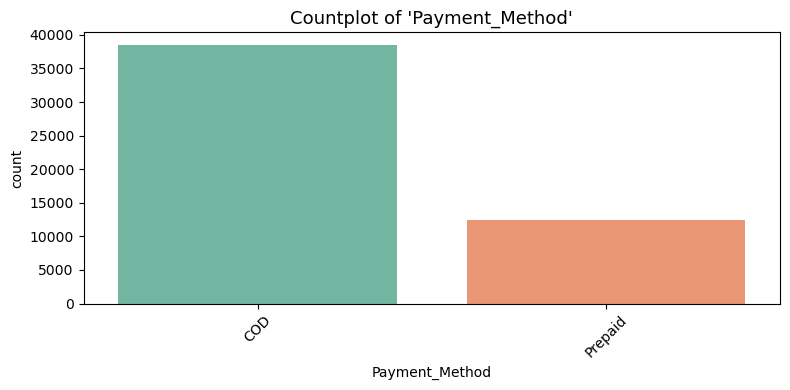

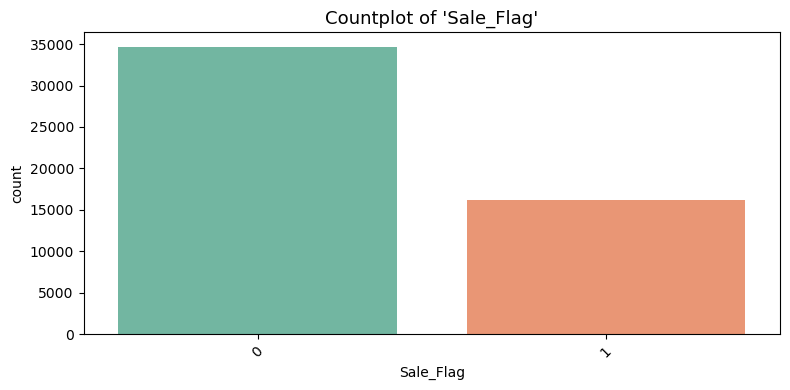

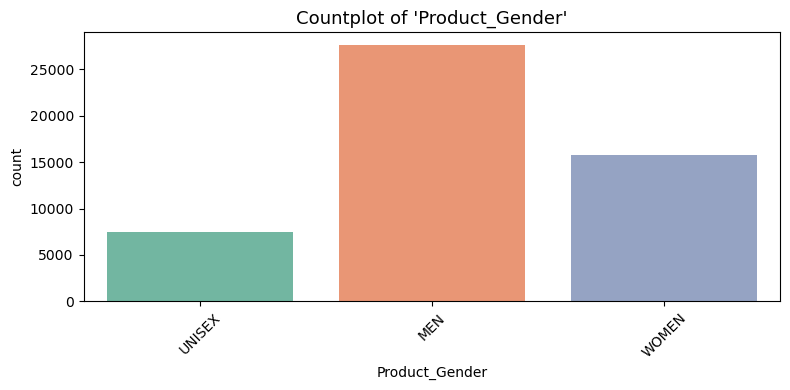

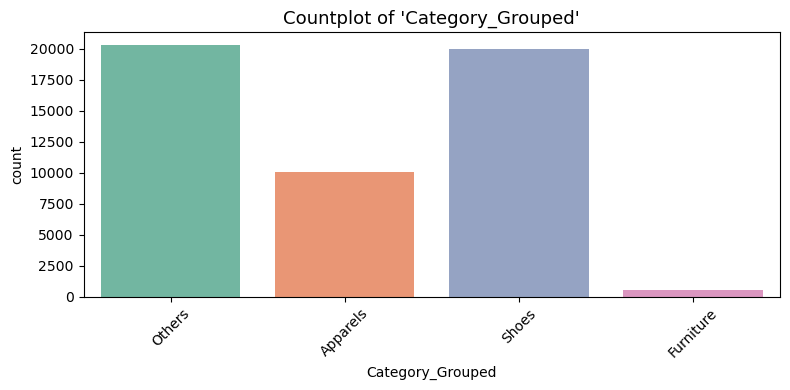

In [22]:
# 📊 Plot countplots for selected categorical columns
selected_cols = ['Payment_Method', 'Sale_Flag', 'Product_Gender', 'Category_Grouped']

for col in selected_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=df, palette="Set2")
        plt.title(f"Countplot of '{col}'", fontsize=13)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"⚠️ Column '{col}' not found in the DataFrame!")

In [23]:
# --- 9. Outlier Detection using IQR Method ---
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# 📦 Store outlier stats for each numeric column
outlier_summary = []

for col in df.select_dtypes(include='number').columns:
    total_rows = df[col].shape[0]
    outliers = detect_outliers(col)
    outlier_count = outliers.shape[0]
    outlier_percent = (outlier_count / total_rows) * 100

    outlier_summary.append({
        "Column": col,
        "Outliers Count": outlier_count,
        "Outliers %": round(outlier_percent, 2)
    })

# 📊 Display outlier summary
outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

,Column,Outliers Count,Outliers %
0,S.no,0,0.00
1,Sale_Flag,0,0.00
2,coupon_money_effective,10531,20.71
3,Coupon_Percentage,4142,8.15
4,Quantity,23,0.05
5,Cost_Price,3663,7.20
6,Item_Price,2756,5.42
7,Special_Price_effective,616,1.21
8,paid_pr_effective,0,0.00
9,Value_CM1,4064,7.99


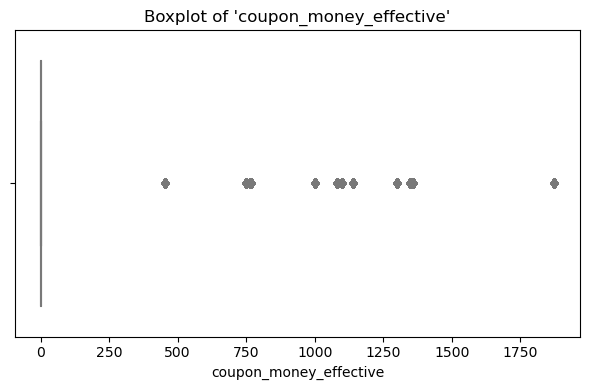

count    50846.000000
mean       215.132299
std        441.535678
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1873.750000
Name: coupon_money_effective, dtype: float64


In [24]:
# 📦 Visualize distribution and outliers in 'coupon_money_effective'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['coupon_money_effective'], color='lightblue')
plt.title("Boxplot of 'coupon_money_effective'")
plt.tight_layout()
plt.show()

# 📊 Summary statistics
print(df['coupon_money_effective'].describe())

In [25]:
# 🔝 Top 10 highest values in 'Cost_Price'
df['Cost_Price'].sort_values(ascending=False).head(10)

10075    6386.45
5422     6386.45
19900    6386.45
12597    6386.45
41939    6386.45
13302    6386.45
9790     6386.45
49459    6386.45
16070    6386.45
16077    6386.45
Name: Cost_Price, dtype: float64

In [26]:
# 🔝 Top 10 highest values in 'Coupon_Percentage'
df['Coupon_Percentage'].sort_values(ascending=False).head(10)

15302    25
9184     25
18942    25
9218     25
18948    25
9217     25
48363    25
33411    25
33401    25
33396    25
Name: Coupon_Percentage, dtype: int64

# -------------------------------------
# 📂 Step 2: Load and Clean the Data
# -------------------------------------


In [27]:
# 📥 Load dataset and treat common missing text values as NaN from the start
df = pd.read_csv("Paytm_Epurchase_data.csv", na_values=["", "n/a", "na", "null", "none"])

# 🧼 Clean object columns: remove leading/trailing spaces + lowercase all text
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip().str.lower()

# 📋 Display dataset info to verify structure and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50846 entries, 0 to 50845
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S.no                     50846 non-null  int64  
 1   Name                     50846 non-null  object 
 2   Shipping_city            50846 non-null  object 
 3   Category_Grouped         50846 non-null  object 
 4   Category                 50846 non-null  object 
 5   Sub_category             50846 non-null  object 
 6   Product_Gender           50205 non-null  object 
 7   Segment                  50846 non-null  object 
 8   Family                   35313 non-null  object 
 9   Brand                    50846 non-null  object 
 10  Brick                    50846 non-null  object 
 11  Item_NM                  50846 non-null  object 
 12  Color                    50846 non-null  object 
 13  Size                     50846 non-null  object 
 14  Sale_Flag             

# ------------------------------------------
# 🧼 Step 3: Handle Missing Values
# ------------------------------------------

# تعويض القيم الناقصة في الأعمدة المهمة

# لو العمود عبارة عن "تصنيف" (Categorical)

In [28]:
# Fill missing values in 'Product_Gender' with 'unknown' (fallback if no imputation logic available)
df['Product_Gender'].fillna("unknown", inplace=True)

# Fill missing values in 'Family' with 'no_family' to mark unavailable entries
df['Family'].fillna("no_family", inplace=True)

# --------------------------------------------
# 🎯 Step 5: Define Features (X) and Target (y)
# --------------------------------------------


In [29]:
# 🎯 Define the target variable
y = df["Sale_Flag"]

# ✅ Select relevant features for modeling (excluding the target)
selected_features = [
    "Shipping_city", "Category_Grouped", "Sub_category", "Product_Gender", "Segment",
    "Brand", "Payment_Method", "coupon_money_effective", "Coupon_Percentage",
    "Item_Price", "Special_Price_effective", "paid_pr_effective"
]

# 📦 Feature matrix
X = df[selected_features]

In [30]:
# 📊 Check distribution of the target variable
class_counts = y.value_counts()
class_percentages = y.value_counts(normalize=True) * 100

print("📦 Class Counts:")
print(class_counts)

print("\n📊 Class Percentages:")
print(class_percentages)

📦 Class Counts:
Sale_Flag
0    34675
1    16171
Name: count, dtype: int64

📊 Class Percentages:
Sale_Flag
0    68.196122
1    31.803878
Name: proportion, dtype: float64


In [31]:
# ✅ Define categorical and numerical columns
categorical_cols = [
    "Shipping_city", "Category_Grouped", "Sub_category",
    "Product_Gender", "Segment", "Brand", "Payment_Method"
]

numerical_cols = [
    "coupon_money_effective", "Coupon_Percentage",
    "Item_Price", "Special_Price_effective", "paid_pr_effective"
]

In [32]:
# ⚙️ Create a preprocessing pipeline that handles both types of features
preprocessor = ColumnTransformer(
    transformers=[
        # Scale numerical features
        ("num", StandardScaler(), numerical_cols),

        # Apply One-Hot Encoding to categorical features
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 🤖 Dictionary of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "SVM": SVC(class_weight='balanced'),
    "XGBoost": XGBClassifier(scale_pos_weight=2, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# ✂️ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 🔁 Loop over models and evaluate
for model_name, model in models.items():
    print(f"\n🚀 Model: {model_name}")
    
    # 🔧 Build pipeline for each model
    pipeline = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("classifier", model)
    ])
    
    # 🎯 Train the model
    pipeline.fit(X_train, y_train)
    
    # 🔍 Predict on test set
    y_pred = pipeline.predict(X_test)
    
    # 📊 Evaluate
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print("✅ F1 Score:", f1_score(y_test, y_pred))
    print("📄 Classification Report:")
    print(classification_report(y_test, y_pred))



🚀 Model: Logistic Regression
✅ Accuracy: 0.9000983284169125
✅ F1 Score: 0.8401510383889238
📄 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      6936
           1       0.86      0.83      0.84      3234

    accuracy                           0.90     10170
   macro avg       0.89      0.88      0.88     10170
weighted avg       0.90      0.90      0.90     10170


🚀 Model: Random Forest
✅ Accuracy: 0.9974434611602753
✅ F1 Score: 0.9959777227722773
📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6936
           1       1.00      1.00      1.00      3234

    accuracy                           1.00     10170
   macro avg       1.00      1.00      1.00     10170
weighted avg       1.00      1.00      1.00     10170


🚀 Model: SVM
✅ Accuracy: 0.9816125860373648
✅ F1 Score: 0.9715762273901808
📄 Classification Report:
              pre

C:\Users\loudy\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:45:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.9983284169124877
✅ F1 Score: 0.9973753280839895
📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6936
           1       1.00      1.00      1.00      3234

    accuracy                           1.00     10170
   macro avg       1.00      1.00      1.00     10170
weighted avg       1.00      1.00      1.00     10170



C:\Users\loudy\AppData\Local\Temp\ipykernel_10536\173287630.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\loudy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


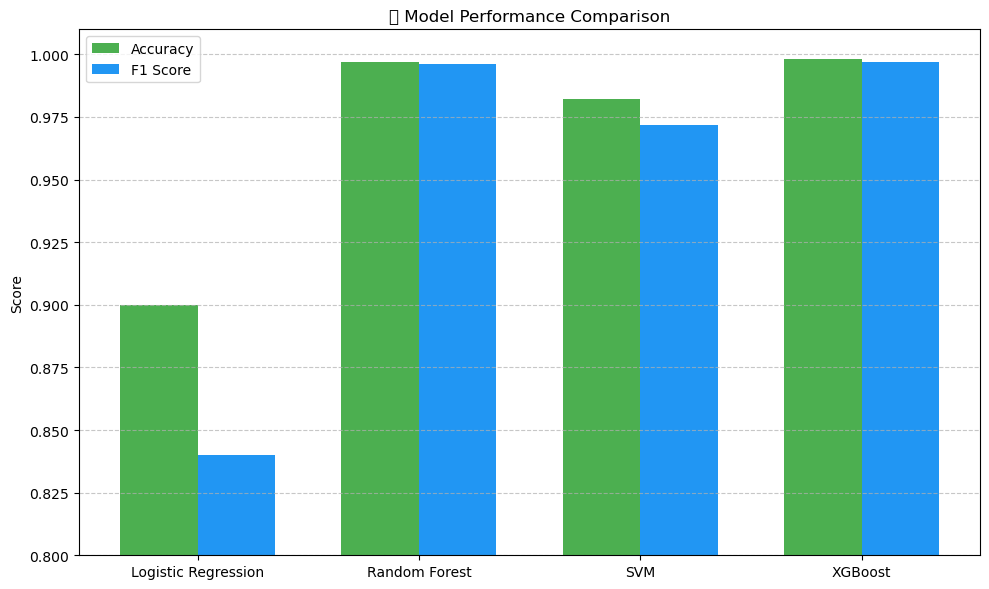

In [34]:
import matplotlib.pyplot as plt

# 🧪 Store model results
model_names = ["Logistic Regression", "Random Forest", "SVM", "XGBoost"]
accuracies = [0.900, 0.997, 0.982, 0.998]
f1_scores = [0.840, 0.996, 0.972, 0.997]

# 📊 Plot comparison
x = range(len(model_names))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar([i - width/2 for i in x], accuracies, width=width, label="Accuracy", color="#4CAF50")
plt.bar([i + width/2 for i in x], f1_scores, width=width, label="F1 Score", color="#2196F3")

# 🏷️ Formatting
plt.xticks(x, model_names)
plt.ylabel("Score")
plt.ylim(0.8, 1.01)
plt.title("📊 Model Performance Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [35]:
from sklearn.model_selection import cross_val_score
import numpy as np

# 🤖 List of models to cross-validate
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "SVM": SVC(class_weight='balanced'),
    "XGBoost": XGBClassifier(scale_pos_weight=2, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 📦 Store results
cv_results = {}

# 🔁 Loop over each model and perform cross-validation
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("classifier", model)
    ])

    # 🔄 Perform 5-fold cross-validation with F1 scoring
    f1_scores = cross_val_score(pipeline, X, y, cv=3, scoring="f1")

    # 🧾 Store the mean and std
    cv_results[model_name] = {
        "Mean F1": np.mean(f1_scores),
        "STD F1": np.std(f1_scores)
    }

# 📊 Display results
print("\n📈 Cross-Validation F1 Scores:")
for model_name, scores in cv_results.items():
    print(f"{model_name}: Mean F1 = {scores['Mean F1']:.4f} | STD = {scores['STD F1']:.4f}")


C:\Users\loudy\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:52:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\loudy\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:52:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\loudy\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:52:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📈 Cross-Validation F1 Scores:
Logistic Regression: Mean F1 = 0.8455 | STD = 0.0131
Random Forest: Mean F1 = 0.9962 | STD = 0.0005
SVM: Mean F1 = 0.9706 | STD = 0.0077
XGBoost: Mean F1 = 0.9968 | STD = 0.0004


In [36]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [37]:
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier with appropriate parameters
final_model = XGBClassifier(
    scale_pos_weight=2,          # Handle class imbalance by weighting the positive class
    use_label_encoder=False,     # Disable legacy label encoder (not needed with newer versions)
    eval_metric='logloss',       # Set evaluation metric to log loss
    random_state=42              # Set random state for reproducibility
)

# Fit the model on the processed training data
final_model.fit(X_train_processed, y_train)


C:\Users\loudy\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:52:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = final_model.predict(X_test_processed)

# Print the model's accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Generate and print a detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9983284169124877
Confusion Matrix:
 [[6923   13]
 [   4 3230]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6936
           1       1.00      1.00      1.00      3234

    accuracy                           1.00     10170
   macro avg       1.00      1.00      1.00     10170
weighted avg       1.00      1.00      1.00     10170



In [39]:
# Create a DataFrame to store actual vs predicted values
results_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

# Export the results to a CSV file
results_df.to_csv("model_results.csv", index=False)
